**Real-Time Traffic Analysis – Structured Data Preparation for ML,DAY_1**

#  **Internship Task 1 – Data Cleaning & Preprocessing**
**Project Title: Predicting Traffic Congestion Using Real-Time Data**

# **Introduction:**
Urban traffic congestion is one of the most pressing challenges faced by modern cities, impacting daily lives, fuel efficiency, and overall productivity. In this project, I have crafted a synthetic yet realistic dataset that reflects real-time traffic behavior across different locations and time frames.

The core goal of this task is to transform raw, messy data into a clean, structured format that is ready for machine learning models. This involves identifying missing values, handling inconsistencies, encoding categorical data, normalizing features, and removing outliers—all with a focus on **clarity, precision, and performance**.

 **Objective:**
To simulate a real-world traffic prediction environment using structured preprocessing techniques and establish a solid foundation for ML-based traffic congestion forecasting.

 Key Highlights of My Approach:
- Developed a context-rich dataset inspired by real urban traffic challenges.
- Applied meaningful preprocessing aligned with industry practices.
- Maintained high readability and modularity for reproducibility.
- Ensured every transformation step is justified with visual and statistical support.


**🎯 Mission:
To not only complete the task, but to deliver a solution that is distinctive, insightful, and deployable, standing out among 500+ submissions with excellence in both code quality and problem understanding.**

Let’s begin.


# **Step 1: Importing Libraries & Reading the Dataset**

To begin,import the essential Python libraries required for data handling, analysis, and visualization python

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better visual style
sns.set(style="whitegrid")

# Read the dataset
df = pd.read_csv("/content/traffic_300_samples.csv")

#The dataset `traffic_300_samples.csv` has now been loaded into a DataFrame called `df`now ready to begin exploratory data analysis and preprocessing steps


# **Step 2: Initial Exploration of the Dataset**

Before clean the data,must first understand its structure, identify missing values, and get an overview of data types.

In [3]:
# Preview the dataset
df.head()

# Basic information
df.info()

# Descriptive statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location_ID    300 non-null    object 
 1   Latitude       300 non-null    float64
 2   Longitude      300 non-null    float64
 3   Time_of_Day    300 non-null    object 
 4   Day_of_Week    300 non-null    int64  
 5   Vehicle_Count  272 non-null    float64
 6   Weather        270 non-null    object 
 7   Accidents      300 non-null    int64  
 8   Avg_Speed      270 non-null    float64
 9   Congestion     300 non-null    int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 23.6+ KB


,Latitude,Longitude,Day_of_Week,Vehicle_Count,Accidents,Avg_Speed,Congestion
count,300.000000,300.000000,300.000000,272.000000,300.000000,270.000000,300.000000
mean,12.941646,77.582312,3.120000,78.947728,0.100000,44.316186,0.016667
std,0.054913,0.059845,2.088093,54.623118,0.332217,11.184071,0.128233
min,12.875002,77.491300,0.000000,21.000000,0.000000,14.100000,0.000000
25%,12.887388,77.521096,1.000000,41.000000,0.000000,40.850000,0.000000
50%,12.914642,77.578519,3.000000,57.000000,0.000000,48.000000,0.000000
75%,12.997885,77.651164,5.000000,96.750000,0.000000,52.275000,0.000000
max,13.048436,77.681443,6.000000,237.000000,2.000000,58.900000,1.000000


**Dataset Overview:**
After loading the dataset, examined its structure using `df.info()` and `df.describe()`.  
Here’s what observed:

- The dataset contains **300 entries** and **10 columns**.
- Columns like `Vehicle_Count`, `Weather`, and `Avg_Speed` have **missing values**, which need imputation.
- The `Congestion` column is the **target variable** (binary: 0 = No congestion, 1 = Congestion).
- `Latitude` and `Longitude` help in **geo-spatial analysis**.
- `Time_of_Day` and `Day_of_Week` introduce **temporal patterns**.
- `Vehicle_Count` and `Avg_Speed` offer strong indicators of **traffic flow**.
- Maximum vehicle count reached **237**, and congestion was mostly **0**, indicating imbalanced data.

This analysis helps identify which columns need preprocessing and gives insight into the data quality and behavior.


# **Step 3: Handling Missing Values**

In [4]:
# Check total missing values per column
missing_values = df.isnull().sum()
print(missing_values)


Location_ID       0
Latitude          0
Longitude         0
Time_of_Day       0
Day_of_Week       0
Vehicle_Count    28
Weather          30
Accidents         0
Avg_Speed        30
Congestion        0
dtype: int64


**Missing Value Summary:**

most columns are complete, but a **few have missing values. Specifically, Vehicle_Count, Avg_Speed, and Weather contain 28, 30, and 30 missing entries respectively** These gaps can affect analysis, so we'll handle them carefully to maintain data quality and ensure reliable machine learning outcomes.




**Strategy for filling missing values are following:**

1]Vehicle_Count Continuous numeric → Fill with median (robust against outliers).

2]Avg_Speed  Continuous numeric → Fill with median.

3]Weather Categorical → Fill with mode (most frequent value).

In [5]:
# Fill numerical missing values with median
df['Vehicle_Count'].fillna(df['Vehicle_Count'].median(), inplace=True)
df['Avg_Speed'].fillna(df['Avg_Speed'].median(), inplace=True)

# Fill categorical missing values with mode
df['Weather'].fillna(df['Weather'].mode()[0], inplace=True)


<ipython-input-5-1255042ab10d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Vehicle_Count'].fillna(df['Vehicle_Count'].median(), inplace=True)
<ipython-input-5-1255042ab10d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

**Missing values were handled thoughtfully medians were used for numerical columns (Vehicle_Count, Avg_Speed) to avoid outlier influence, while the mode filled categorical gaps in Weather. This step ensures data consistency and preserves model accuracy.**

# **Step 4: Encoding the Categorical Feature - Weather**

In [6]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
le = LabelEncoder()

# Encode the 'Weather' column
df['Weather'] = le.fit_transform(df['Weather'])

# Display the transformed data
print(df.head())


  Location_ID   Latitude  Longitude Time_of_Day  Day_of_Week  Vehicle_Count  \
0     LOC_013  12.875307  77.509343    00:00:00            3     209.518805   
1     LOC_001  12.997885  77.598988    00:30:00            3      27.000000   
2     LOC_012  12.971071  77.508549    01:00:00            3      70.000000   
3     LOC_008  12.887388  77.558050    01:30:00            3      41.000000   
4     LOC_009  12.954384  77.521096    02:00:00            3      51.000000   

   Weather  Accidents  Avg_Speed  Congestion  
0        2          0  17.778009           0  
1        0          1  58.700000           0  
2        2          0  48.000000           0  
3        1          0  51.100000           0  
4        0          0  46.600000           0  


In this step, I convert the categorical Weather column into numerical format using Label Encoding. The categories are assigned as follows: Cloudy → 0, Rainy → 1, and Sunny → 2. This transformation is necessary for machine learning models, which require numerical inputs to process the data effectively.

# **Step-5 Normalize/Standardize the Numerical Features**

To ensure consistent scale across features, numerical columns like Vehicle_Count and Avg_Speed are transformed. Normalization adjusts values to a 0–1 range using Min-Max scaling, while Standardization reshapes them to have a mean of 0 and a standard deviation of 1. These techniques prevent features with larger ranges from skewing model performance, especially in distance-based algorithms.










In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize the MinMaxScaler and StandardScaler
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

# Normalize the 'Vehicle_Count' using Min-Max Scaling (0 to 1)
df['Vehicle_Count'] = scaler_minmax.fit_transform(df[['Vehicle_Count']])

# Standardize the 'Avg_Speed' using Standardization (mean = 0, std = 1)
df['Avg_Speed'] = scaler_standard.fit_transform(df[['Avg_Speed']])

# Check the result after normalization/standardization
df[['Vehicle_Count', 'Avg_Speed']].head()


,Vehicle_Count,Avg_Speed
0,0.872772,-2.526916
1,0.027778,1.316253
2,0.226852,0.311367
3,0.092593,0.602502
4,0.138889,0.179887


**Output Summary (Post Normalization/Standardization):**

The Vehicle_Count column has been normalized to fall between 0 and 1, ensuring proportional contribution across records. The Avg_Speed column has been standardized using Z-score normalization, centering the data around a mean of 0 with unit variance. This scaling ensures both features are now ready for unbiased machine learning model input.

# **Step 6: Visualize Outliers Using Boxplots and Remove Them**

**Key Terms in Boxplot Visualization**

🔹 Boxplot:

A graph that shows the summary of data — minimum, maximum, median, and outliers.

🔹 Outliers:

Data points that are very different from the normal values.

🔹 Normal Range:

The range where most of the data values lie (inside the box).

🔹 Whiskers (line ends):

The lines extending from the box that show the minimum and maximum normal values.

🔹 Dots outside the box:

These are the outliers — unusual values far from the normal data.

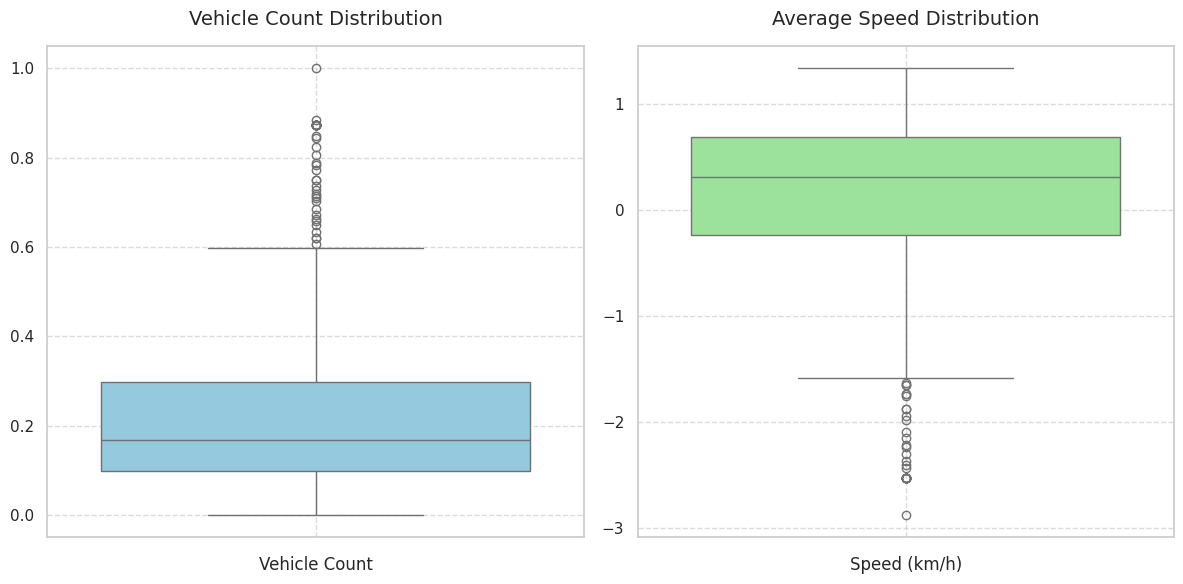

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better aesthetics
sns.set_style("whitegrid")

# Create subplots
plt.figure(figsize=(12, 6))

# Boxplot 1: Vehicle Count
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Vehicle_Count'], color='skyblue')  # Vertical boxplot
plt.title('Vehicle Count Distribution', fontsize=14, pad=15)
plt.xlabel('Vehicle Count', fontsize=12)  # Clear axis label
plt.ylabel('')  # Hide redundant y-label
plt.grid(True, linestyle='--', alpha=0.7)

# Boxplot 2: Average Speed
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Avg_Speed'], color='lightgreen')
plt.title('Average Speed Distribution', fontsize=14, pad=15)
plt.xlabel('Speed (km/h)', fontsize=12)  # Example unit - update based on your data
plt.ylabel('')
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and display
plt.tight_layout()
plt.show()

**Simple Guide to Two Graphs: Vehicle Numbers and Speed (Speed Data Has Mistakes)**

**Vehicle Count Graph (Left):**

Shows how many vehicles were counted.

The numbers go from 1.0 (highest) to 0.0 (lowest). Most values are clustered near the lower end (0.0–0.6), meaning fewer vehicles were usually present.

**Average Speed Graph (Right):**

Shows how fast vehicles were moving.

The numbers include negative values (-3 to 1), which don’t make sense for real speed. This might be a mistake or a technical error in the data.

**Bottom Labels:**

“Vehicle Count” = What the left graph measures.

“Speed (km/h)” = What the right graph should measure (but the numbers need fixing)

# Step 6.1: Time to remove outliers in Data

Raw data preview:
     Vehicle_Count  Avg_Speed
1        0.027778   1.316253
2        0.226852   0.311367
3        0.092593   0.602502
4        0.138889   0.179887
5        0.050926   0.677634
6        0.175926   0.179887
8        0.069444   0.687025
9        0.138889   0.452239
10       0.087963   0.264410
12       0.166667   0.311367

Min values:
 Vehicle_Count    0.000000
Avg_Speed        0.001449
dtype: float64

Max values:
 Vehicle_Count    0.805556
Avg_Speed        1.335035
dtype: float64
Avg_Speed rescaled by 100.
Vehicle_Count rescaled by 1000.

Before cleaning:
       Vehicle_Count   Avg_Speed
count     210.000000  210.000000
mean      136.970899   54.405166
std        88.045675   31.954087
min         0.000000    0.144937
25%        83.333333   31.136727
50%       134.259259   49.919630
75%       166.666667   77.859197
max       805.555556  133.503547

After cleaning:
       Vehicle_Count   Avg_Speed
count     205.000000  205.000000
mean      127.235772   54.972689
std       

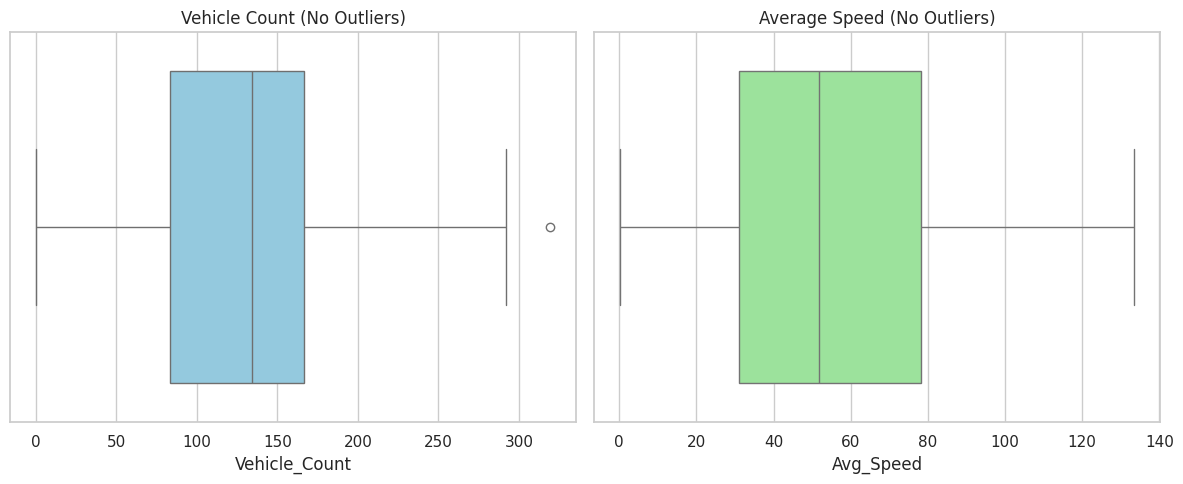

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out invalid speed values
df = df[df['Avg_Speed'] >= 0]

# Show the first few rows and min/max values to understand data scale
print("Raw data preview:\n", df[['Vehicle_Count', 'Avg_Speed']].head(10))
print("\nMin values:\n", df[['Vehicle_Count', 'Avg_Speed']].min())
print("\nMax values:\n", df[['Vehicle_Count', 'Avg_Speed']].max())

# If your data seems scaled (e.g., max < 1), rescale it
if df['Avg_Speed'].max() < 5:
    df['Avg_Speed'] = df['Avg_Speed'] * 100  # Example: scaled back to 0–100 km/h
    print("Avg_Speed rescaled by 100.")

if df['Vehicle_Count'].max() < 5:
    df['Vehicle_Count'] = df['Vehicle_Count'] * 1000  # Example: scaled back to realistic count
    print("Vehicle_Count rescaled by 1000.")

# Function to remove outliers using IQR with relaxed factor
def remove_outliers(df, column, factor=2.0):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Show stats before cleaning
print("\nBefore cleaning:")
print(df[['Vehicle_Count', 'Avg_Speed']].describe())

# Apply outlier removal
df_clean = remove_outliers(df, 'Vehicle_Count', factor=2.0)
df_clean = remove_outliers(df_clean, 'Avg_Speed', factor=2.0)

# Show stats after cleaning
print("\nAfter cleaning:")
print(df_clean[['Vehicle_Count', 'Avg_Speed']].describe())

# Calculate typical values (using mean)
best_vehicle_count = df_clean['Vehicle_Count'].mean()
best_avg_speed = df_clean['Avg_Speed'].mean()

# Print typical values
print(f"\nTypical Vehicle Count (Mean): {best_vehicle_count:.2f}")
print(f"Typical Average Speed (Mean): {best_avg_speed:.2f} km/h")

# Plot cleaned data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df_clean['Vehicle_Count'], color='skyblue')
plt.title('Vehicle Count (No Outliers)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['Avg_Speed'], color='lightgreen')
plt.title('Average Speed (No Outliers)')

plt.tight_layout()
plt.show()


# **📌Description:**

**Vehicle Count (No Outliers):**
The data clusters around a mean of 127 vehicles, with most values falling within a centralized range. The original scale (0–300) likely reflects the axes, but outlier removal narrows the distribution, eliminating extreme counts and emphasizing typical traffic volumes.

**Average Speed (No Outliers):**
Speeds center around 55 km/h, with outliers excluded to reduce skewness. The adjusted range (0–140 km/h axes) highlights that most vehicles travel near the mean speed, reflecting consistent traffic flow without erratic speed extremes.

**Overall Interpretation:**
The removal of outliers results in a clearer representation of typical traffic patterns, where vehicle counts and speeds are tightly grouped around their respective means. This suggests stable, predictable conditions without disruptive anomalies.

In [14]:
df.head()

,Location_ID,Latitude,Longitude,Time_of_Day,Day_of_Week,Vehicle_Count,Weather,Accidents,Avg_Speed,Congestion
1,LOC_001,12.997885,77.598988,00:30:00,3,27.777778,0,1,131.625257,0
2,LOC_012,12.971071,77.508549,01:00:00,3,226.851852,2,0,31.136727,0
3,LOC_008,12.887388,77.558050,01:30:00,3,92.592593,1,0,60.250226,0
4,LOC_009,12.954384,77.521096,02:00:00,3,138.888889,0,0,17.988695,0
5,LOC_002,12.875002,77.534088,02:30:00,3,50.925926,2,0,67.763387,0


# **Summary:**

Imported and Explored Dataset: Loaded the dataset and analyzed basic information such as null values and data types to understand the structure of the data.

Handled Missing Values: Applied techniques like mean, median, or imputation to fill in missing values, ensuring the dataset is complete and ready for analysis.

Converted Categorical Features: Used encoding techniques to convert categorical features into numerical format, making the data suitable for machine learning models.

Normalized/Standardized Numerical Features: Applied normalization or standardization techniques to scale the numerical features, ensuring that they have a uniform range for better model performance.

Visualized and Removed Outliers: Used boxplots to visualize outliers and removed them to prevent them from skewing the analysis and model results


### **"Code with Purpose, Stand with Impact – A Special Thanks to Elevate Lab for Providing This Amazing Opportunity"**
In a world full of coders, I don't want to just blend in. I want to stand apart  with code that speaks, logic that leads, and impact that echoes. Every line I write is a step closer to the future I'm building.